In [ ]:
#Baixando bibliotecas
!sudo apt-get install python-grib
!sudo python setup.py install
!sudo apt-get install libgeos-dev
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
!apt install libgrib-api-dev libgrib2c-dev
!pip install pyproj==1.9.6
!pip install pygrib

In [3]:
#Instalando as bibliotecas
import pygrib
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
#3 dias de previsão

!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_000.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_003.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_006.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_009.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_012.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_015.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_018.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_021.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_024.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_027.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_030.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_033.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_036.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_039.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_042.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_045.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_048.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_051.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_054.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_057.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_060.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_063.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_066.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_069.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_072.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_075.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_078.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_081.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_084.grb2
!wget https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202107/20210714/gfs_4_20210714_0000_087.grb2

In [ ]:
#Abrindo os dados e selecionando as váriaveis
gr = pygrib.open('gfs_4_20210702_1800_006.grb2')
t = gr.select(name='Temperature')[0]
#Definindo região do RS
data, lats, lons = t.data(lat1=-35,lat2=-25,lon1=220,lon2=320)

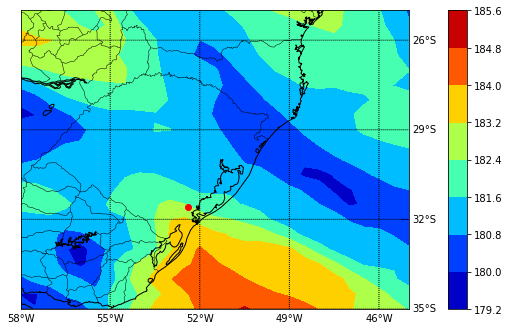

In [ ]:
#Visualizando a grade selecionada
m = Basemap(projection='cyl',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='i')
# Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))


#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)
#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
la = np.arange(-35,-25,3.)
lo = np.arange(302.,315.,3.)
m.drawparallels(la,labels=[False,True,True,False])
m.drawmeridians(lo,labels=[True,False,False,True])
#m.scatter(lons, lats, marker = 'o', color='r', zorder=2)
#Função do Basemap para realizar a interpolação e criação de polígonos
contourf = m.contourf(x, y, np.squeeze(data),cmap='jet')
m.colorbar(contourf, location='right', pad="10%")
#Marcando cidade de Pelotas
m.scatter(307.6, -31.6, marker = 'o', color='r', zorder=3)

In [ ]:
#Encontrando um lat e lon mais próximo
#Lat Lon selecionado
def encontra_lat_lon(la,lo):
    stn_lat =  la
    stn_lon = lo
    lat = lats  
    lon = lons 
    abslat = np.abs(lat-stn_lat)
    abslon= np.abs(lon-stn_lon) 
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    return(x,y)

In [ ]:
#Aplicando para encontrar os index dos valores mais próximas
encontra_lat_lon(-31.6,307.6)

(array([13]), array([175]))

In [ ]:
#Pegando o dado da respectiva região de Pelotas 
data[13,175]

182.41283203125

In [6]:
#Abrindo 3 dias de dados
gr = pygrib.open('gfs_4_20210714_0000_000.grb2')
gr2 = pygrib.open('gfs_4_20210714_0000_003.grb2')
gr3 = pygrib.open('gfs_4_20210714_0000_006.grb2')
gr4 = pygrib.open('gfs_4_20210714_0000_009.grb2')
gr5 = pygrib.open('gfs_4_20210714_0000_012.grb2')
gr6 = pygrib.open('gfs_4_20210714_0000_015.grb2')
gr7 = pygrib.open('gfs_4_20210714_0000_018.grb2')
gr8 = pygrib.open('gfs_4_20210714_0000_021.grb2')
gr9 = pygrib.open('gfs_4_20210714_0000_024.grb2')
gr10 = pygrib.open('gfs_4_20210714_0000_027.grb2')
gr11 = pygrib.open('gfs_4_20210714_0000_030.grb2')
gr12 = pygrib.open('gfs_4_20210714_0000_033.grb2')
gr13 = pygrib.open('gfs_4_20210714_0000_036.grb2')
gr14 = pygrib.open('gfs_4_20210714_0000_039.grb2')
gr15 = pygrib.open('gfs_4_20210714_0000_042.grb2')
gr16 = pygrib.open('gfs_4_20210714_0000_045.grb2')
gr17 = pygrib.open('gfs_4_20210714_0000_048.grb2')
gr18 = pygrib.open('gfs_4_20210714_0000_051.grb2')
gr19 = pygrib.open('gfs_4_20210714_0000_054.grb2')
gr20 = pygrib.open('gfs_4_20210714_0000_057.grb2')
gr21 = pygrib.open('gfs_4_20210714_0000_060.grb2')
gr22 = pygrib.open('gfs_4_20210714_0000_063.grb2')
gr23 = pygrib.open('gfs_4_20210714_0000_066.grb2')
gr24 = pygrib.open('gfs_4_20210714_0000_069.grb2')
gr25 = pygrib.open('gfs_4_20210714_0000_072.grb2')
gr26 = pygrib.open('gfs_4_20210714_0000_075.grb2')
gr27 = pygrib.open('gfs_4_20210714_0000_078.grb2')
gr28 = pygrib.open('gfs_4_20210714_0000_081.grb2')
gr29 = pygrib.open('gfs_4_20210714_0000_084.grb2')
gr30 = pygrib.open('gfs_4_20210714_0000_087.grb2')

In [7]:
# 1-Pegando os dados de temperatura referente aos níveis do modelo (ajustar lat e lon).

def selec_t(dadoo,name_v,indx_lat,index_lon):    

    dadt=[]
    #Superfície
    t1=dadoo.select(name=name_v)[41]
    data1, lats, lons = t1.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data1[indx_lat,index_lon])
    #1000
    t2=dadoo.select(name=name_v)[40]
    data2, lats, lons = t2.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data2[indx_lat,index_lon])
    #975
    t3=dadoo.select(name=name_v)[39]
    data3, lats, lons = t3.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data3[indx_lat,index_lon])
    #950    
    t4=dadoo.select(name=name_v)[38]
    data4, lats, lons = t4.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data4[indx_lat,index_lon])
    #925    
    t5=dadoo.select(name=name_v)[37]
    data5, lats, lons = t5.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data5[indx_lat,index_lon])
    #900
    t6=dadoo.select(name=name_v)[36]
    data6, lats, lons = t6.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data6[indx_lat,index_lon])
    #850
    t7=dadoo.select(name=name_v)[35]
    data7, lats, lons = t7.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data7[indx_lat,index_lon])
    #800
    t8=dadoo.select(name=name_v)[34]
    data8, lats, lons = t8.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data8[indx_lat,index_lon])
    #750
    t9=dadoo.select(name=name_v)[33]
    data9, lats, lons = t9.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data9[indx_lat,index_lon])
    #700
    t10=dadoo.select(name=name_v)[32]
    data10, lats, lons = t10.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data10[indx_lat,index_lon])
    #650
    t11=dadoo.select(name=name_v)[31]
    data11, lats, lons = t11.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data11[indx_lat,index_lon])  
    #600
    t12=dadoo.select(name=name_v)[30]
    data12, lats, lons = t12.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data12[indx_lat,index_lon])
    #550
    t13=dadoo.select(name=name_v)[29]
    data13, lats, lons = t13.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data13[indx_lat,index_lon])
    #500hPa
    t14=dadoo.select(name=name_v)[28]
    data14, lats, lons = t14.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data14[indx_lat,index_lon])
    #450hPa
    t15=dadoo.select(name=name_v)[27]
    data15, lats, lons = t15.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data15[indx_lat,index_lon])
    #400hPa
    t16=dadoo.select(name=name_v)[26]
    data16, lats, lons = t16.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data16[indx_lat,index_lon])
    #350hPa
    t17=dadoo.select(name=name_v)[25]
    data17, lats, lons = t17.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data17[indx_lat,index_lon])
    #300hPa
    t18=dadoo.select(name=name_v)[24]
    data18, lats, lons = t18.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data18[indx_lat,index_lon])
    #250hPa
    t19=dadoo.select(name=name_v)[23]
    data19, lats, lons = t19.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data19[indx_lat,index_lon])
    #200hPa
    t20=dadoo.select(name=name_v)[22]
    data20, lats, lons = t20.data(lat1=-35,lat2=-25,lon1=220,lon2=320)
    dadt.append(data20[indx_lat,index_lon])
    return dadt


# 2 Função para criar e concatenar dataFrame (Aajuste de Temperatura - 273.15)
def transf_ajust(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30):
    index=['1013','1000','975','950','925','900','850','800','750','700','650','600','550','500','450','400','350','300','250','200']
    ind = pd.DataFrame(index, columns=['niveis'] )
    a1=pd.DataFrame(a1)
    a2=pd.DataFrame(a2)
    a3=pd.DataFrame(a3)
    a4=pd.DataFrame(a4)
    a5=pd.DataFrame(a5)
    a6=pd.DataFrame(a6)
    a7=pd.DataFrame(a7)
    a8=pd.DataFrame(a8)
    a9=pd.DataFrame(a9)
    a10=pd.DataFrame(a10)
    a11=pd.DataFrame(a11)
    a12=pd.DataFrame(a12)
    a13=pd.DataFrame(a13)
    a14=pd.DataFrame(a14)
    a15=pd.DataFrame(a15)
    a16=pd.DataFrame(a16)
    a17=pd.DataFrame(a17)
    a18=pd.DataFrame(a18)
    a19=pd.DataFrame(a19)
    a20=pd.DataFrame(a20)
    a21=pd.DataFrame(a21)
    a22=pd.DataFrame(a22)
    a23=pd.DataFrame(a23)
    a24=pd.DataFrame(a24)
    a25=pd.DataFrame(a25)
    a26=pd.DataFrame(a26)
    a27=pd.DataFrame(a27)
    a28=pd.DataFrame(a28)
    a29=pd.DataFrame(a29)
    a30=pd.DataFrame(a30)
    f = pd.concat([ind,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30], axis=1)
    return f

In [13]:
#Aplicando Função(dado no formato grib, 'nome da variavél desejada')
na='Relative humidity'
dad1=selec_t(gr,na)
dad2=selec_t(gr2,na)
dad3=selec_t(gr3,na)
dad4=selec_t(gr4,na)
dad5=selec_t(gr5,na)
dad6=selec_t(gr6,na)
dad7=selec_t(gr7,na)
dad8=selec_t(gr8,na)
dad9=selec_t(gr9,na)
dad10=selec_t(gr10,na)
dad11=selec_t(gr11,na)
dad12=selec_t(gr12,na)
dad13=selec_t(gr13,na)
dad14=selec_t(gr14,na)
dad15=selec_t(gr15,na)
dad16=selec_t(gr16,na)
dad17=selec_t(gr17,na)
dad18=selec_t(gr18,na)
dad19=selec_t(gr19,na)
dad20=selec_t(gr20,na)
dad21=selec_t(gr21,na)
dad22=selec_t(gr22,na)
dad23=selec_t(gr23,na)
dad24=selec_t(gr24,na)
dad25=selec_t(gr25,na)
dad26=selec_t(gr26,na)
dad27=selec_t(gr27,na)
dad28=selec_t(gr28,na)
dad29=selec_t(gr29,na)
dad30=selec_t(gr30,na)

In [14]:
# 2 Função para criar e concatenar dataFrame (Aajuste de Temperatura - 273.15)
df=transf_ajust(dad1,dad2,dad3,dad4,dad5,dad6,dad7,dad8,dad9,dad10,dad11,dad12,dad13,dad14,dad15,dad16,dad17,dad18,dad19,dad20,dad21,dad22,dad23,dad24,dad25,dad26,dad27,dad28,dad29,dad30)

In [15]:
df.columns = ['niveis','00', '03', '06','09','12','15','18','21','24','27','30','33','36','39','42','45','48','51','54','57','60', '63', '66','69','72','75','78','81','84','87']
Y = df['niveis'].astype(float)
del df['niveis']
df.iloc[::-1]
df.reset_index(drop=True)
X = df.columns.values[:].astype(float)
X, Y = np.meshgrid(X, Y)

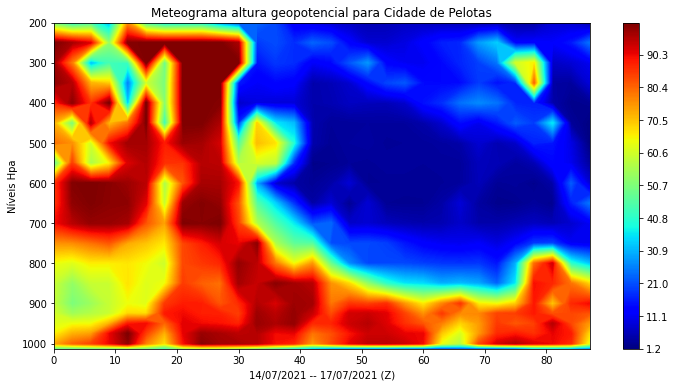

In [16]:
#Plotando figura 
fig,ax=plt.subplots(1,1)
fig.set_size_inches(12, 6) 
fig.set_size_inches(12, 6) 
plt.gca().invert_yaxis()

plt.title('Meteograma altura geopotencial para Cidade de Pelotas')
plt.xlabel('14/07/2021 -- 17/07/2021 (Z)')
plt.ylabel('Níveis Hpa')
cp= ax.contourf(X,Y,df,1000,cmap='jet')
fig.colorbar(cp)

In [ ]:
for g in gr:
    print(g)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 30 hrs:from 202107130000
2:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
3:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
4:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
5:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
6:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
7:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 1:fcst time 30 hrs:from 202107130000
8:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 2:fcst time 30 hrs:from 202107130000
9:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 30 hrs:from 202107130000
10:Visibility:m (instant):regular_ll:surface:level 0:fcst 